In [3]:
import cv2

In [4]:
print(cv2.__version__)

4.5.4


In [6]:
x = cv2.SIFT_create()

In [7]:
import os

In [8]:
os.getcwd()

'/Users/g0p00cc/Desktop/GTA Code'

In [10]:
import matplotlib.pyplot as plt

### Panorama Creation

In [56]:
image_1 = cv2.imread('/Users/g0p00cc/Desktop/GTA Code/Panorama_Images/pano_1.jpg')

# image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

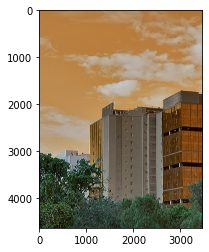

In [57]:
plt.imshow(image_1);

In [58]:
image_1_gs = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

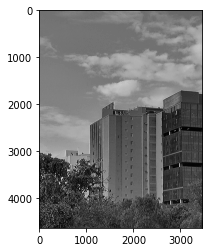

In [59]:
plt.imshow(image_1_gs, cmap = 'gray');

In [60]:
# Applying SIFT detector
sift = cv2.SIFT_create() 
kp = sift.detect(image_1_gs, None)

In [63]:
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(image_1_gs,kp,image_1)

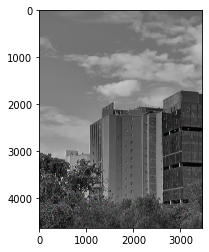

In [64]:
plt.imshow(img);

In [32]:
image_2 = cv2.imread('/Users/g0p00cc/Desktop/GTA Code/Panorama_Images/pano_2.jpg')

image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

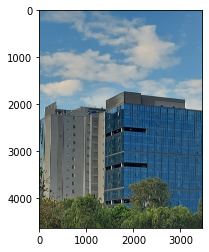

In [33]:
plt.imshow(image_2);

In [ ]:

  


  

  
cv2.imwrite('image-with-keypoints.jpg', img)

In [34]:
image_2_gs = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

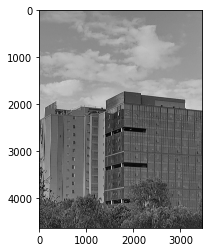

In [35]:
plt.imshow(image_2_gs, cmap = 'gray');

In [36]:
sift = cv2.SIFT_create()

In [37]:
kp1,des1 = sift.detectAndCompute(image_1_gs, None)
kp2,des2 = sift.detectAndCompute(image_2_gs, None)

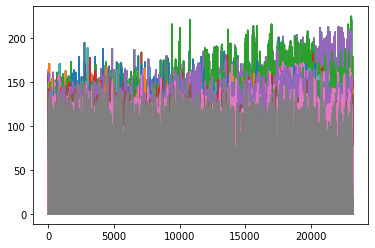

In [43]:
plt.plot(des1);

In [44]:
bf = cv2.BFMatcher()

In [45]:
matches = bf.knnMatch(des1,des2,k=2)

In [46]:
good = []

In [47]:
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [50]:
matched_imge = cv2.drawMatches(image_1_gs, kp1, image_2_gs, kp2, good, None)

error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'drawMatches'
> Overload resolution failed:
>  - Can't parse 'matches1to2'. Sequence item with index 0 has a wrong type
>  - Can't parse 'matches1to2'. Sequence item with index 0 has a wrong type
>  - drawMatches() missing required argument 'matchesThickness' (pos 7)
>  - drawMatches() missing required argument 'matchesThickness' (pos 7)


In [ ]:
keypoints1, des1= sift.detectAndCompute(image1, None)
keypoints2, des2= sift.detectAndCompute(image2, None)

# initialize Brute force matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(des1,des2)

#sort the matches 
matches = sorted(matches, key= lambda match : match.distance)

matched_imge = cv.drawMatches(image1, keypoints1, image2, keypoints2, matches[:30], None)

cv.imshow("Matching Images", matched_imge)
cv.waitKey(0)

#### Image Feature Extraction and Matching for Newbies

In [65]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [66]:
os.getcwd()

'/Users/g0p00cc/Desktop/GTA Code'

In [68]:
dataset_path = '/Users/g0p00cc/Desktop/GTA Code/'

In [71]:
img_building = cv2.imread(os.path.join(dataset_path, 'building_1.jpeg'))

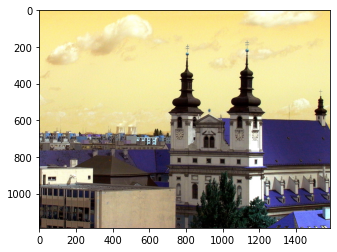

In [72]:
plt.imshow(img_building);

In [73]:
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

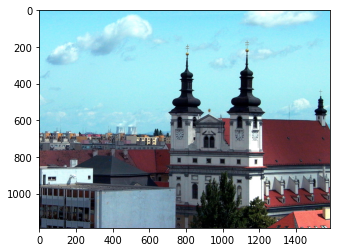

In [74]:
plt.imshow(img_building);

In [75]:
orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.

In [76]:
key_points, description = orb.detectAndCompute(img_building, None)

In [77]:
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.

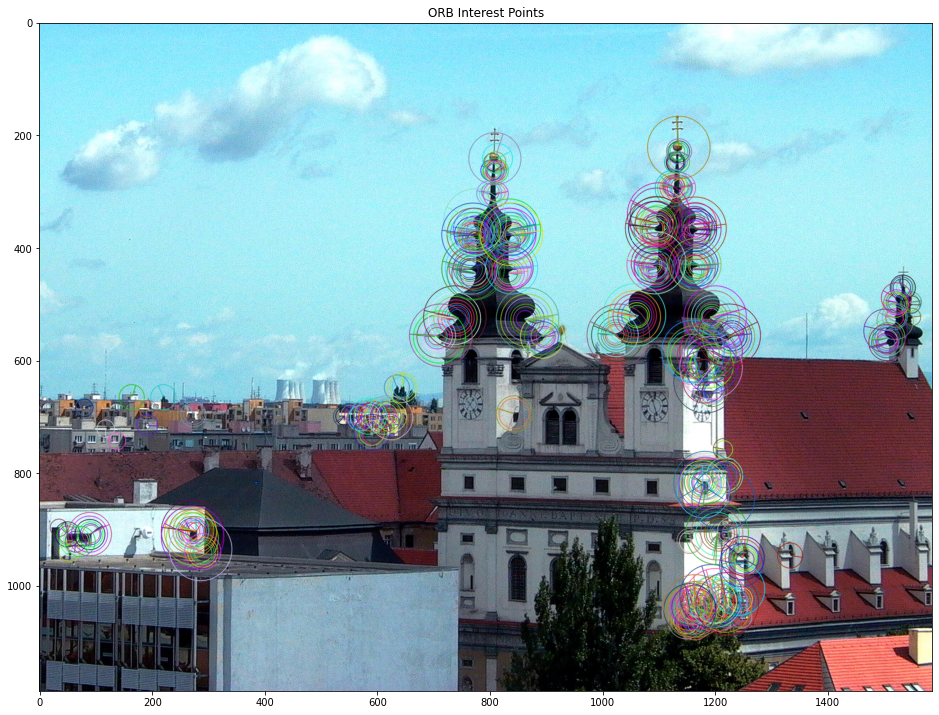

In [78]:
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

In [79]:
def image_detect_and_compute(detector, img_name):
    """Detect and compute interest points and their descriptors."""
    img = cv2.imread(os.path.join(dataset_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des

In [80]:
def draw_image_matches(detector, img1_name, img2_name, nmatches=10):
    """Draw ORB feature matches of the given two images."""
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) # Show top 10 matches
    plt.figure(figsize=(16, 16))
    plt.title(type(detector))
    plt.imshow(img_matches); plt.show()

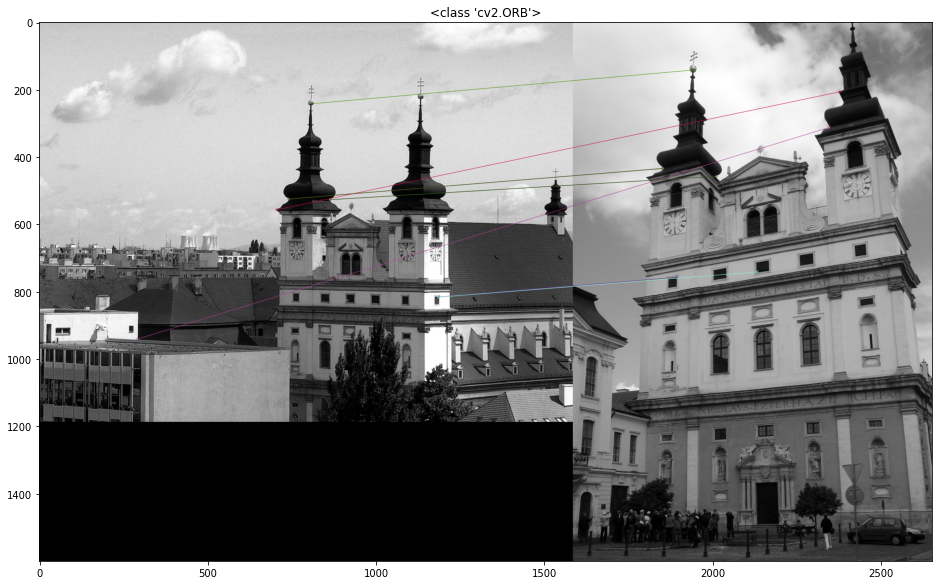

In [82]:
orb = cv2.ORB_create()
draw_image_matches(orb, 'building_1.jpeg', 'building_2.jpeg')

In [84]:
sift = cv2.SIFT_create()

In [85]:
kp, des = sift.detectAndCompute(img_building, None)

In [86]:
img_kp = cv2.drawKeypoints(img_building, kp, img_building)

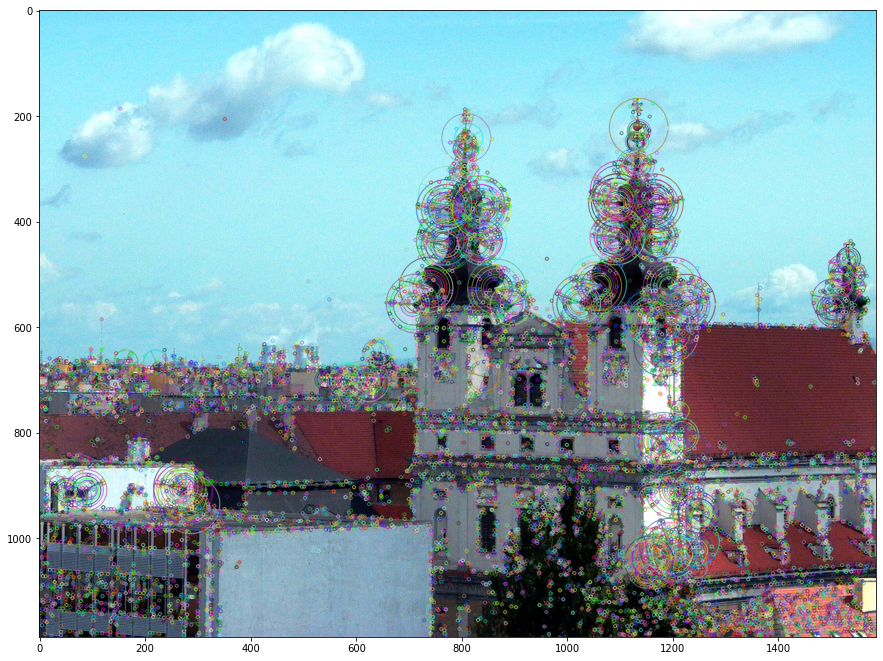

In [87]:
plt.figure(figsize=(15, 15))
plt.imshow(img_kp); plt.show()

In [88]:
img1, kp1, des1 = image_detect_and_compute(sift, 'building_1.jpeg')
img2, kp2, des2 = image_detect_and_compute(sift, 'building_2.jpeg')

In [89]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

In [90]:
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1, des2, k=2)

In [91]:
matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.55*n.distance:
        matchesMask[i] = [1, 0]

In [92]:
draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)

In [93]:
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

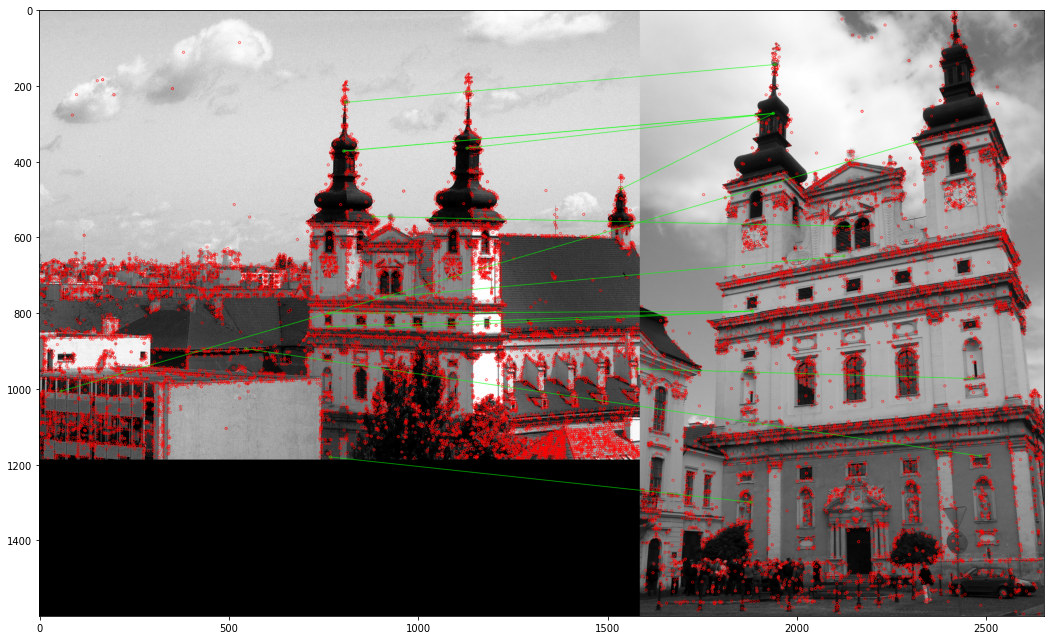

In [94]:
plt.figure(figsize=(18, 18))
plt.imshow(img3); plt.show()

# Networkx

In [95]:
# Dependencies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from subprocess import check_output
import matplotlib.pyplot as plt
import networkx as nx

In [96]:
hypercube_graph(3)

NameError: name 'hypercube_graph' is not defined